In [5]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
# import seaborn as sns
import os

In [6]:
itr = 6
# name = 'matmul'
# param = '40960'

name = 'fib'
param = '45'

time_FF = []
time_Hclib = []

queue_FF = []
queue_Hclib = []

# open the text file
for i in range(1, itr+1):
    flag = False
    
    file = open(f'/mnt/hdd2/home/aamleen2022/FenceFree_Deq/test/misc/results/{name}_{param}_{i}.txt', 'r')
    # extract line having word Total time:
    for line in file:
        if flag == True:
            queue_FF.append(list(map(float, line.split())))

        if 'Total time:' in line:
            time_FF.append(float(line.split()[2]))
            

        if 'Starting Dumping' in line:
            flag = True
        
    file.close()

    flag = False

    file = open(f'/mnt/hdd2/home/aamleen2022/Original/hclib-iiitd/test/misc/results/{name}_{param}_{i}.txt', 'r')
    for line in file:
        if flag == True:
            queue_Hclib.append(list(map(float, line.split())))
        
        if 'Total time:' in line:
            time_Hclib.append(float(line.split()[2]))
            
        if 'Starting Dumping' in line:
            flag = True
        
    file.close()


print(time_FF)
print(time_Hclib)

[20703.037, 20940.273, 20906.419, 20873.711, 20862.728, 20942.649]
[22075.353, 21544.845, 20589.175, 21554.463, 20585.607, 20743.373]


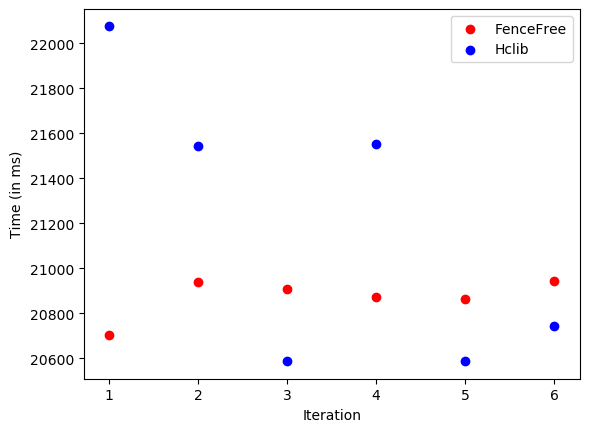

Mean time for FenceFree: 20871.469500000003
Mean time for Hclib: 21182.136000000002


In [7]:
# plot the scatter plot with different colors

plt.scatter(range(1, itr+1), time_FF, color='red', label='FenceFree')
plt.scatter(range(1, itr+1), time_Hclib, color='blue', label='Hclib')
plt.xlabel('Iteration')
plt.ylabel('Time (in ms)')
plt.legend()
plt.show()

mean_ff = np.mean(time_FF)
mean_hclib = np.mean(time_Hclib)

print(f'Mean time for FenceFree: {mean_ff}')
print(f'Mean time for Hclib: {mean_hclib}')

Mean time for FenceFree: 20871.469500000003
Mean time for Hclib: 21182.136000000002


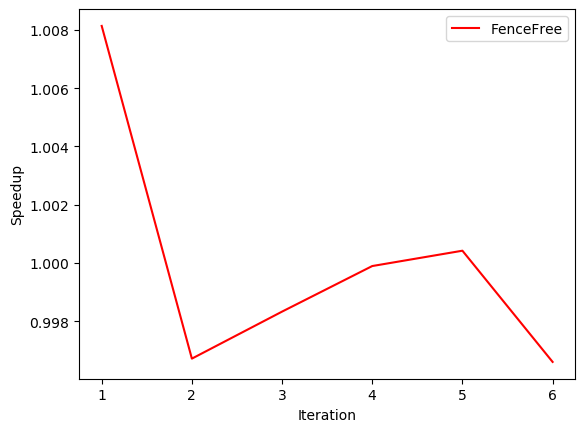

/mnt/hdd2/home/aamleen2022/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


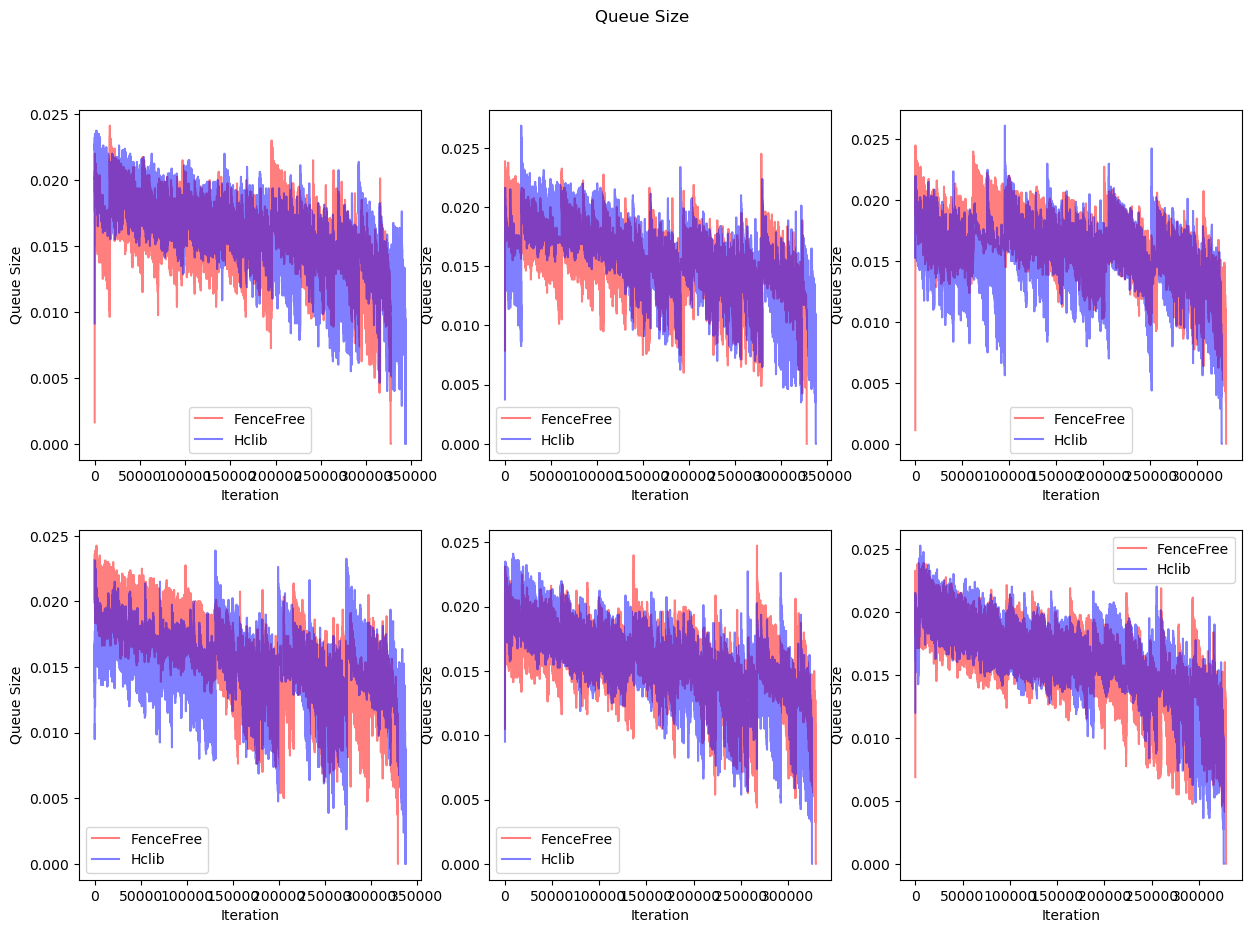

In [10]:
# plot 2 graph for each iteration

for i in range(itr):
    for j in range(len(queue_FF[i])):
        queue_FF[i][j] = queue_FF[i][j]/20

    for j in range(len(queue_Hclib[i])):
        queue_Hclib[i][j] = queue_Hclib[i][j]/20

mean_ff = np.mean(time_FF)
mean_hclib = np.mean(time_Hclib)

print(f'Mean time for FenceFree: {mean_ff}')
print(f'Mean time for Hclib: {mean_hclib}')

# sketch speedup graph

speedup = []
for i in range(itr):
    speedup.append(mean_ff/time_FF[i])

plt.plot(range(1, itr+1), speedup, color='red', label='FenceFree')
plt.xlabel('Iteration')
plt.ylabel('Speedup')
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Queue Size')
for i in range(itr):
    axs[i//3, i%3].plot(range(len(queue_FF[i])), queue_FF[i], color='red', label='FenceFree', alpha=0.5)
    axs[i//3, i%3].plot(range(len(queue_Hclib[i])), queue_Hclib[i], color='blue', label='Hclib', alpha=0.5)
    axs[i//3, i%3].set_xlabel('Iteration')
    axs[i//3, i%3].set_ylabel('Queue Size')
    axs[i//3, i%3].legend()

plt.show()